## analysi-> feat ERng ->model -> web App

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('german_credit_data.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [6]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df["Job"].unique()

array([2, 1, 3, 0])

In [10]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.dropna().reset_index(drop=True)

In [13]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [15]:
df.drop(columns='Unnamed: 0', inplace=True)

Text(0.5, 0.98, 'distribution of Numerical Features')

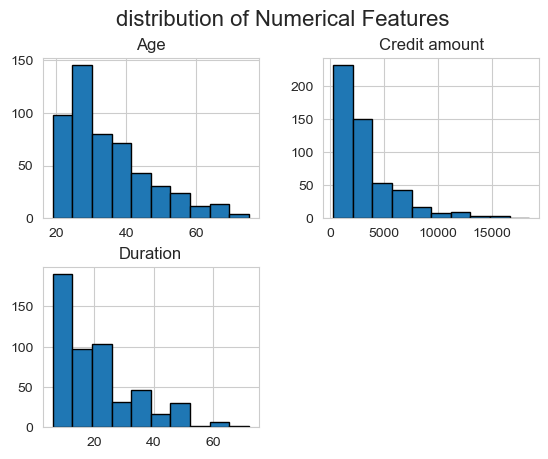

In [16]:
df[["Age", "Credit amount", "Duration"]].hist(bins=10, edgecolor ='black') 
plt.suptitle("distribution of Numerical Features", fontsize=16)

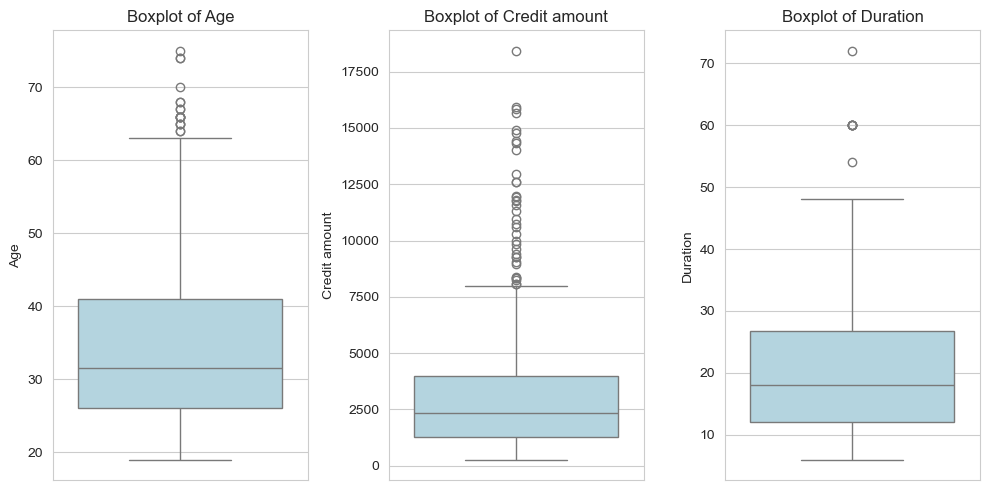

In [17]:
plt.figure(figsize=(10,5))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [18]:
df.query("Duration >=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [19]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\User\AppData\Local\Temp\ipykernel_13812\712867207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2"  ,order=df[col].value_counts().index)
C:\Users\User\AppData\Local\Temp\ipykernel_13812\712867207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2"  ,order=df[col].value_counts().index)
C:\Users\User\AppData\Local\Temp\ipykernel_13812\712867207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2"  ,order=df[col].value_counts().index)
C:\User

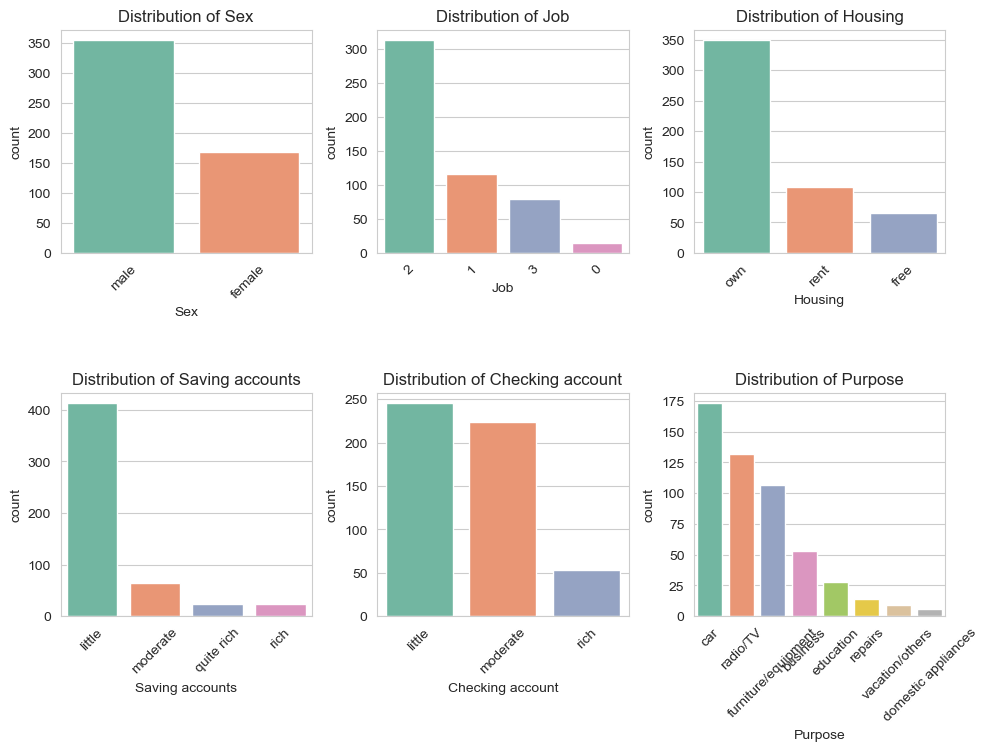

In [20]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette="Set2"  ,order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
corr = df[["Age","Job", "Credit amount", "Duration"]].corr()

In [22]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

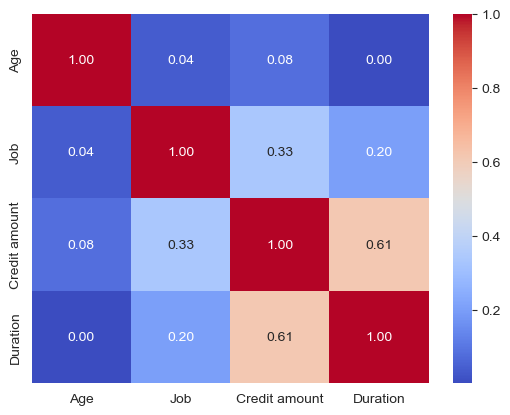

In [23]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [24]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [25]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [26]:
df.pivot_table(values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


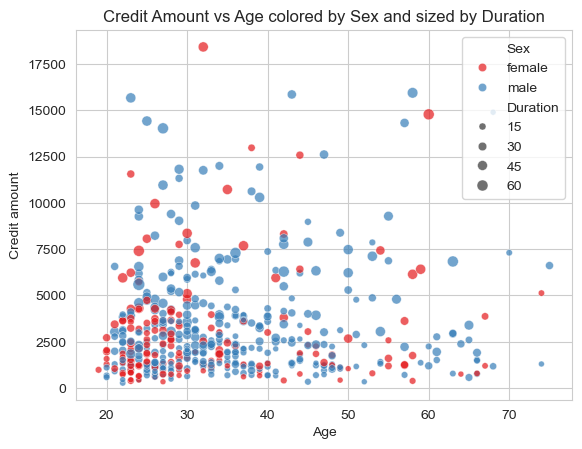

In [27]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", alpha=0.7,size="Duration",palette="Set1")
plt.title("Credit Amount vs Age colored by Sex and sized by Duration")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13812\233927389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount",palette="Pastel1")


Text(0.5, 1.0, 'Credit amount Distribution by Saving Accounts')

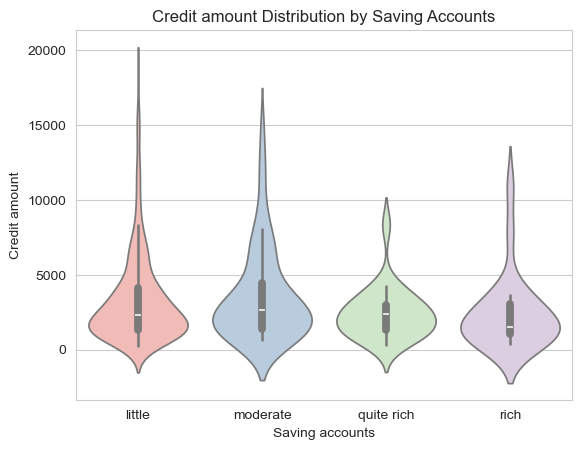

In [28]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount",palette="Pastel1")
plt.title("Credit amount Distribution by Saving Accounts")

In [29]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_13812\2013022128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=col,x="Risk" ,color='lightblue',palette="Pastel2")
C:\Users\User\AppData\Local\Temp\ipykernel_13812\2013022128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=col,x="Risk" ,color='lightblue',palette="Pastel2")
C:\Users\User\AppData\Local\Temp\ipykernel_13812\2013022128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=col,x="Risk" ,color='lightblue',palette="Pastel2")
C:\Users\User\AppData\Local\

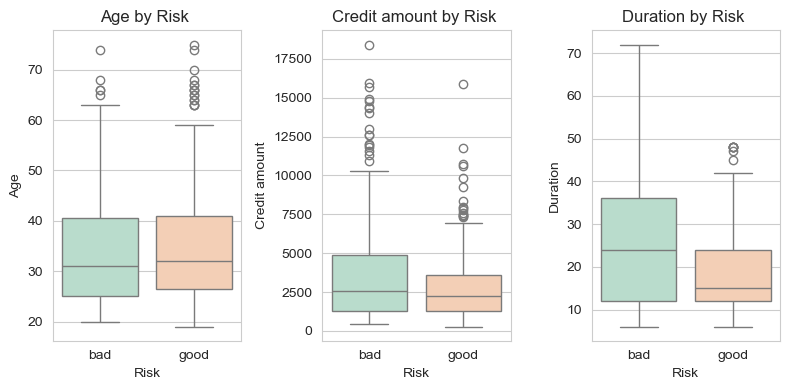

In [30]:
plt.figure(figsize=(8,4))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,y=col,x="Risk" ,color='lightblue',palette="Pastel2")
    plt.title(f'{col} by Risk ')

plt.tight_layout()
plt.show()

In [31]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()


,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [32]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

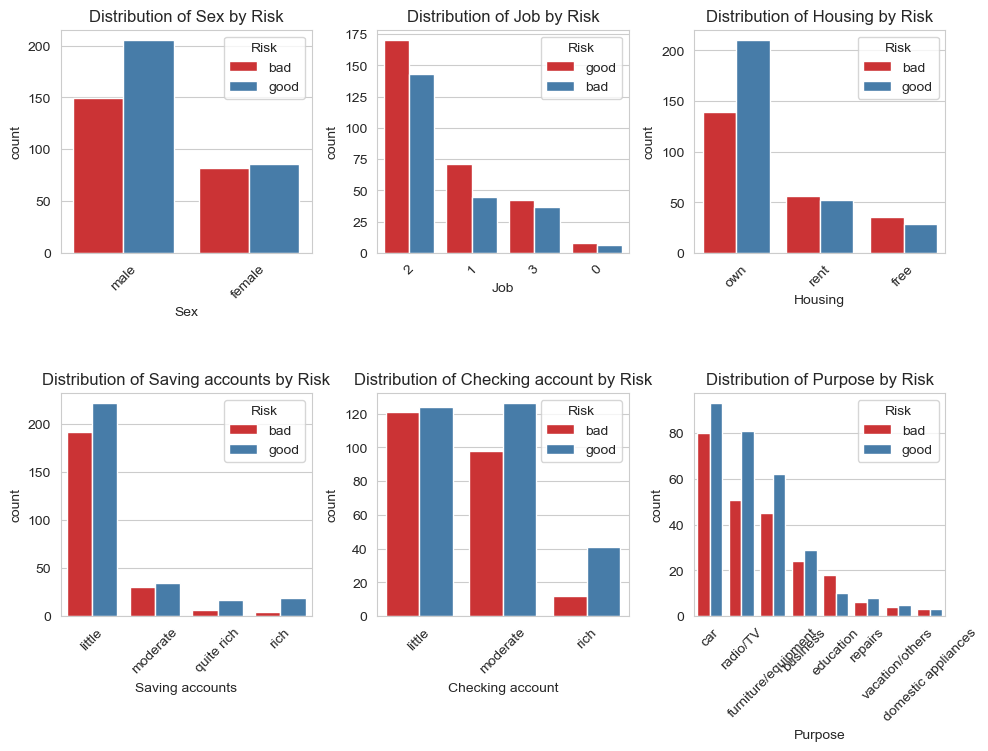

In [33]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue="Risk",palette="Set1"  ,order=df[col].value_counts().index)
    plt.title(f'Distribution of {col} by Risk')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [34]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [35]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]
target = "Risk"

In [36]:
df_model = df[features + [target]].copy()

In [37]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [38]:
from sklearn.preprocessing import LabelEncoder
import joblib



In [39]:
cat_cols = df_model.select_dtypes(include='object').columns.drop("Risk")

In [40]:
le_dict = {}

In [41]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [42]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [43]:
le_target  = LabelEncoder()


In [44]:
target

'Risk'

In [45]:
df_model[target] = le_target.fit_transform(df_model[target])

In [46]:
df_model[target] 

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [47]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [48]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [49]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X = df_model.drop(columns=target,axis=1)

In [52]:
y = df_model[target]

In [53]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [54]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [56]:
X_train.shape

(417, 8)

In [57]:
X_test.shape

(105, 8)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



In [59]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_model, accuracy,grid_search.best_params_

In [60]:
dt = DecisionTreeClassifier(random_state=1,class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [61]:
best_dt,accuracy_dt,params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [62]:
print("Decision Tree Accuracy ",accuracy_dt)

Decision Tree Accuracy  0.580952380952381


In [63]:
print("Best Parameters: ",params_dt)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [64]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced',n_jobs=-1)



In [65]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
best_rf,accuracy_rf,params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)    

In [67]:
print("Random Forest Accuracy ",accuracy_rf)

Random Forest Accuracy  0.6190476190476191


In [68]:
print("Best Parameters: ",params_rf)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [69]:
et = ExtraTreesClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [70]:
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
best_et,acc_et,param_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [72]:
print("Extra Trees Accuracy ",acc_et)

Extra Trees Accuracy  0.6285714285714286


In [73]:
print("Best Parameters: ",param_et)

Best Parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [75]:
xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss', scale_pos_weight= (y_train==0).sum() / (y_train==1).sum())

In [76]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [77]:
best_xgb,acc_xgb,param_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

c:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:27:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [78]:
print("Best XGB accuracy ",acc_xgb)

Best XGB accuracy  0.6190476190476191


In [79]:
print("Best Parameters: ",param_xgb)

Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}


In [80]:
best_et.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [81]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']